Procedemos a ver los dataset implementados sobre las zonas taxis. 

# Predicción de Demanda top 10 zonas de Taxis

Problema: Identificar las zonas con mayor demanda.
Modelos sugeridos:
Modelos de Series Temporales: ARIMA, Prophet, o modelos basados en LSTM.
Regresión: Usando datos históricos para predecir la cantidad de pasajeros o ingresos por hora y zona.
Clustering para zonas de alta demanda: K-Means o DBSCAN para identificar zonas geográficas con alta actividad.

In [19]:
import pandas as pd

# Cargar los archivos proporcionados por el usuario
file_1_path = 'Yellow_Tripdata_2024-10.csv'
file_2_path = 'transformed_taxi_zone_merged_with_locations.csv'

# Leer los datos
yellow_tripdata = pd.read_csv(file_1_path)
transformed_taxi_zone = pd.read_csv(file_2_path)

# Mostrar las primeras filas de cada dataset para entender su estructura
yellow_tripdata_head = yellow_tripdata.head()
transformed_taxi_zone_head = transformed_taxi_zone.head()

# Obtener información general sobre los datos
yellow_tripdata_info = yellow_tripdata.info()
transformed_taxi_zone_info = transformed_taxi_zone.info()

yellow_tripdata_head, transformed_taxi_zone_head, yellow_tripdata_info, transformed_taxi_zone_info


C:\Users\jerom\AppData\Local\Temp\ipykernel_9264\3048582359.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  yellow_tripdata = pd.read_csv(file_1_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833771 entries, 0 to 3833770
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 555.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 t

(   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
 0         2  2024-10-01 00:30:44   2024-10-01 00:48:26              1.0   
 1         1  2024-10-01 00:12:20   2024-10-01 00:25:25              1.0   
 2         1  2024-10-01 00:04:46   2024-10-01 00:13:52              1.0   
 3         1  2024-10-01 00:12:10   2024-10-01 00:23:01              1.0   
 4         1  2024-10-01 00:30:22   2024-10-01 00:30:39              1.0   
 
    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
 0            3.0         1.0                  N           162           246   
 1            2.2         1.0                  N            48           236   
 2            2.7         1.0                  N           142            24   
 3            3.1         1.0                  N           233            75   
 4            0.0         1.0                  N           262           262   
 
    payment_type  fare_amount  extra  mta_tax  tip_amount  t

 
 
 Vemos que hay columnas en ambos data set que son correlativa. Esto significa que las columnas PULocationID y DOLocationID del archivo de los viajes en taxi (Yellow_Tripdata) se pueden relacionar con la columna locationid_x (o locationid_y) del archivo de las zonas (transformed_taxi_zone_merged_with_locations). Esto nos permitirá:

Enriquecer los datos de los viajes: Incorporar información geográfica y contextual, como el barrio (borough_x) y la zona (zone) para cada origen y destino de los viajes.
Realizar análisis geográficos: Por ejemplo, identificar zonas con mayor demanda o patrones de desplazamiento entre barrios.
Voy a realizar una combinación de los datasets para agregar información de las zonas al dataset de los viajes. Permíteme hacerlo.

La combinación se realizó con éxito. Ahora, el dataset de viajes (Yellow Tripdata) ha sido enriquecido con información sobre las zonas de recogida (PULocationID) y destino (DOLocationID), incluyendo:

Barrios de origen y destino (PU_borough, DO_borough).
Zonas específicas de origen y destino (PU_zone, DO_zone).
Información de las zonas de servicio (PU_service_zone, DO_service_zone).
Coordenadas geográficas de las zonas.

In [20]:
# Realizar la combinación de datos: Enriquecer Yellow Tripdata con la información de las zonas
# Unir información de origen (PULocationID)
yellow_tripdata_enriched = yellow_tripdata.merge(
    transformed_taxi_zone, left_on="PULocationID", right_on="locationid_x", how="left", suffixes=("", "_PU")
)

# Renombrar las columnas para distinguir origen y destino
yellow_tripdata_enriched.rename(columns={
    "borough_x": "PU_borough",
    "zone": "PU_zone",
    "service_zone_x": "PU_service_zone",
}, inplace=True)

# Unir información de destino (DOLocationID)
yellow_tripdata_enriched = yellow_tripdata_enriched.merge(
    transformed_taxi_zone, left_on="DOLocationID", right_on="locationid_x", how="left", suffixes=("", "_DO")
)

# Renombrar las columnas para destino
yellow_tripdata_enriched.rename(columns={
    "borough_x": "DO_borough",
    "zone": "DO_zone",
    "service_zone_x": "DO_service_zone",
}, inplace=True)

# Mostrar las primeras filas del dataset enriquecido
yellow_tripdata_enriched.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-10-01 00:30:44   2024-10-01 00:48:26              1.0   
1         1  2024-10-01 00:12:20   2024-10-01 00:25:25              1.0   
2         1  2024-10-01 00:04:46   2024-10-01 00:13:52              1.0   
3         1  2024-10-01 00:12:10   2024-10-01 00:23:01              1.0   
4         1  2024-10-01 00:30:22   2024-10-01 00:30:39              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            3.0         1.0                  N           162           246   
1            2.2         1.0                  N            48           236   
2            2.7         1.0                  N           142            24   
3            3.1         1.0                  N           233            75   
4            0.0         1.0                  N           262           262   

   payment_type  ...  DO_borough                    DO_zone  DO_service_zone  \
0             1  ...   Manhattan  West Chelsea/Hudson Yards      Yellow Zone   
1             1  ...   Manhattan      Upper East Side North      Yellow Zone   
2             1  ...   Manhattan               Bloomingdale      Yellow Zone   
3             1  ...   Manhattan          East Harlem South        Boro Zone   
4             3  ...   Manhattan             Yorkville East      Yellow Zone   

   locationid_y_DO  borough_y_DO  service_zone_y_DO  borough_latitude_DO  \
0              246     Manhattan        Yellow Zone              40.7831   
1              236     Manhattan        Yellow Zone              40.7831   
2               24     Manhattan        Yellow Zone              40.7831   
3               75     Manhattan          Boro Zone              40.7831   
4              262     Manhattan        Yellow Zone              40.7831   

   borough_longitude_DO  zone_latitude_DO  zone_longitude_DO  
0              -73.9712               NaN                NaN  
1              -73.9712               NaN                NaN  
2              -73.9712               NaN                NaN  
3              -73.9712               NaN                NaN  
4              -73.9712               NaN                NaN  

[5 rows x 41 columns]

Para la predicción de la demanda de taxis, usaremos un enfoque basado en series temporales para modelar el comportamiento histórico y predecir la cantidad de viajes en función de zonas y horarios. El primer paso será preparar los datos y seleccionar un modelo adecuado.

Modelo Sugerido: Prophet
Prophet, desarrollado por Facebook, es un modelo robusto para series temporales que permite incorporar tendencias, estacionalidades (como horarios pico) y efectos externos (como eventos específicos).

Pasos:
1. Preparación de los Datos: 
    - Agregar un conteo de viajes por intervalos de tiempo (por ejemplo, horas o días) y por zona de recogida (PULocationID).
    - Crear un dataset con columnas como:
        + Fecha/Hora: Intervalo temporal.
        + Cantidad de viajes: Demanda de taxis.
        + Zona: Opcional, para modelos separados por zona.
2. Entrenamiento del Modelo:
    - Usar Prophet para modelar la serie temporal con tendencias y estacionalidades.
3. Predicción de Demanda:
    - Generar predicciones a futuro para identificar horarios y zonas con mayor demanda.

In [21]:
import pandas as pd

# Convertir las columnas de fecha a formato datetime
yellow_tripdata_enriched["tpep_pickup_datetime"] = pd.to_datetime(
    yellow_tripdata_enriched["tpep_pickup_datetime"]
)

# Crear un dataframe con demanda por hora y zona de recogida (PULocationID)
demand_by_time_zone = yellow_tripdata_enriched.groupby(
    [yellow_tripdata_enriched["tpep_pickup_datetime"].dt.floor("H"), "PULocationID"]
).size().reset_index(name="trip_count")

# Renombrar columnas para uso con Prophet
demand_by_time_zone.rename(columns={
    "tpep_pickup_datetime": "ds",  # Fecha para Prophet
    "trip_count": "y"  # Demanda de taxis
}, inplace=True)

# Mostrar las primeras filas del dataframe preparado
print(demand_by_time_zone.head())


C:\Users\jerom\AppData\Local\Temp\ipykernel_9264\858036825.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  [yellow_tripdata_enriched["tpep_pickup_datetime"].dt.floor("H"), "PULocationID"]


                   ds  PULocationID  y
0 2009-01-01 00:00:00           132  1
1 2024-09-30 23:00:00            43  1
2 2024-09-30 23:00:00            70  1
3 2024-09-30 23:00:00            79  1
4 2024-09-30 23:00:00           114  1


Seleccionaremos las 10 zonas con mayor demanda y entrenaremos el modelo Prophet para predecir la demanda en cada una. A continuación, implementaremos los pasos necesarios:

Identificar las 10 zonas con mayor demanda.
Preparar datos específicos para estas zonas.
Entrenar Prophet para cada una de las zonas.
Visualizar las predicciones.

In [14]:
%pip install prophet


12:58:59 - cmdstanpy - INFO - Chain [1] start processing
12:58:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

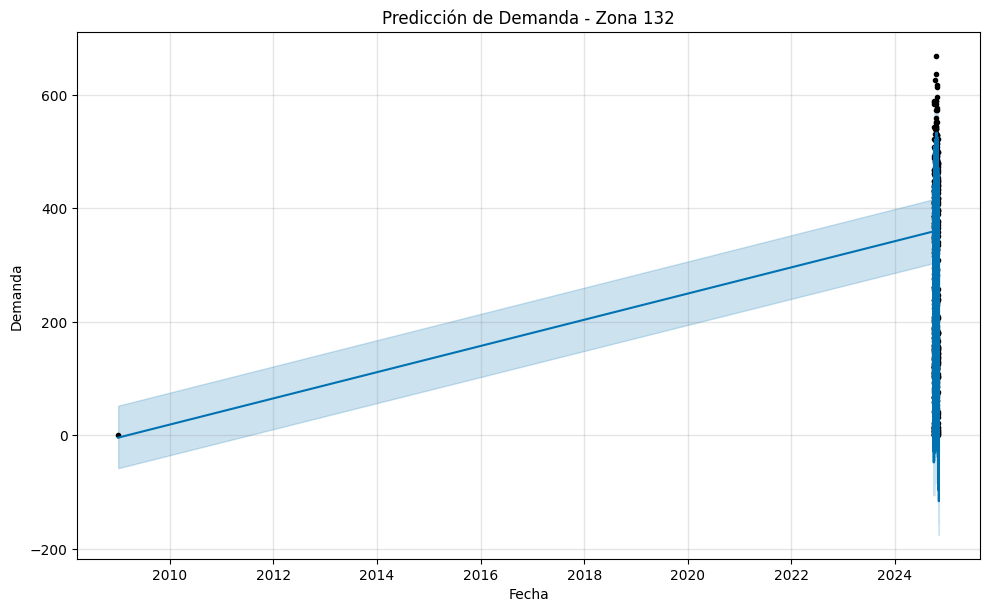

12:59:00 - cmdstanpy - INFO - Chain [1] start processing
12:59:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

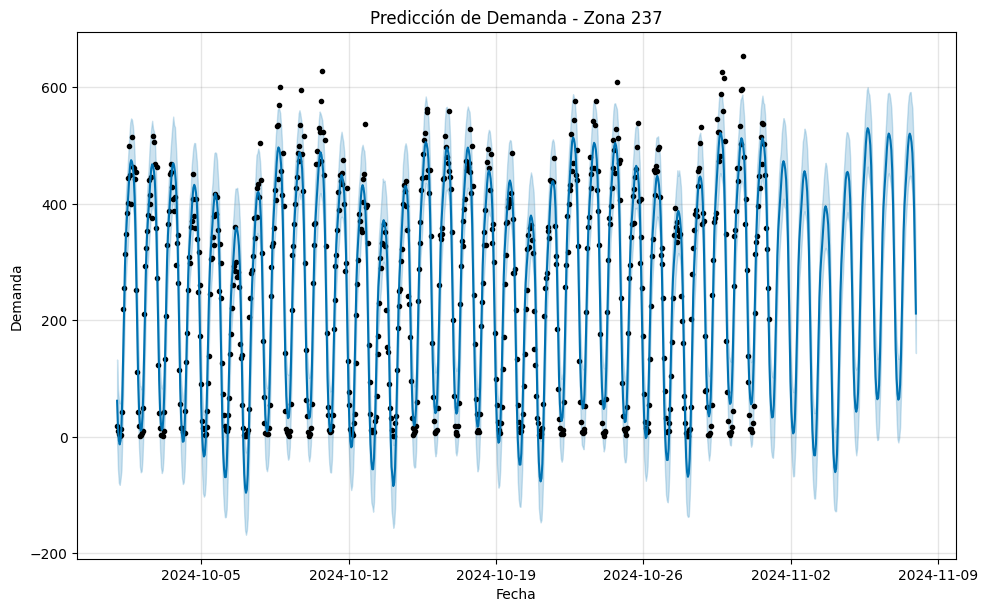

12:59:00 - cmdstanpy - INFO - Chain [1] start processing
12:59:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

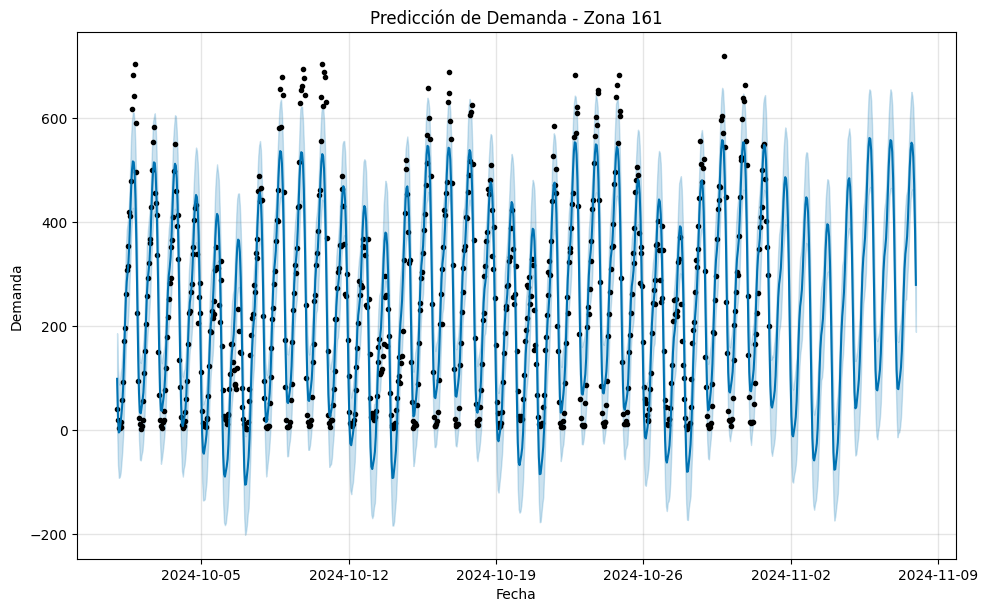

12:59:01 - cmdstanpy - INFO - Chain [1] start processing
12:59:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

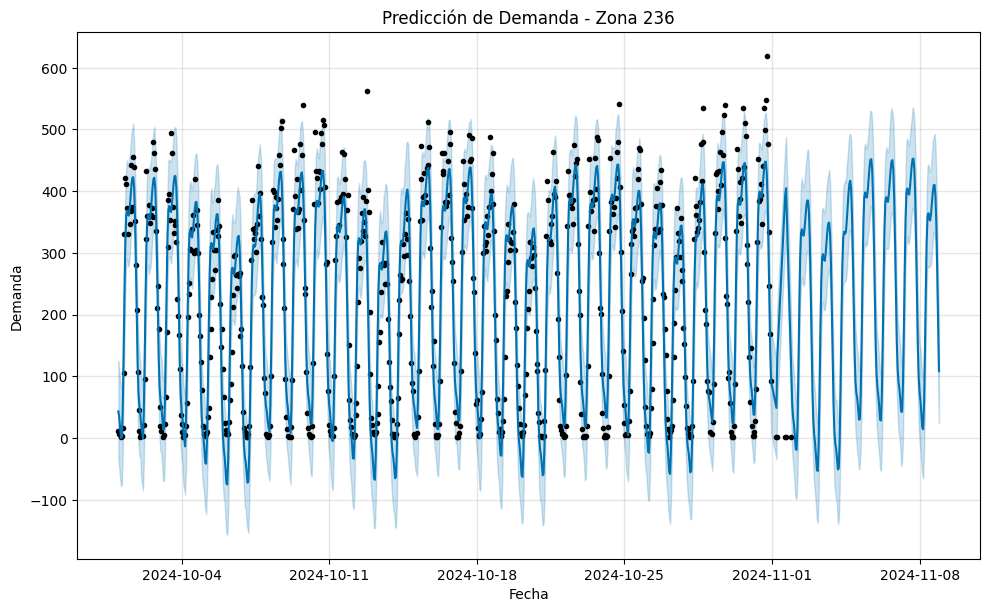

12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

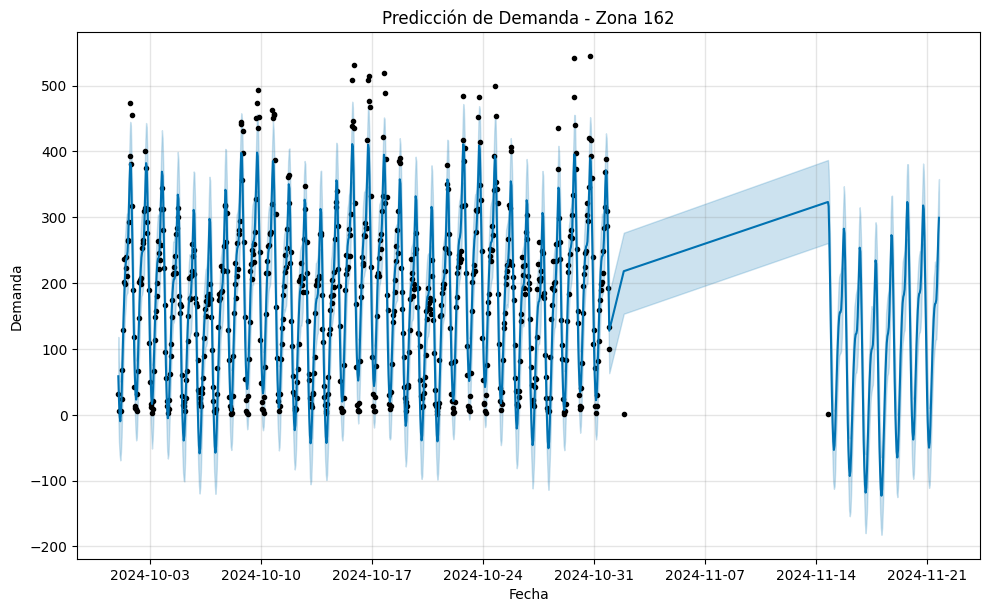

12:59:02 - cmdstanpy - INFO - Chain [1] start processing
12:59:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

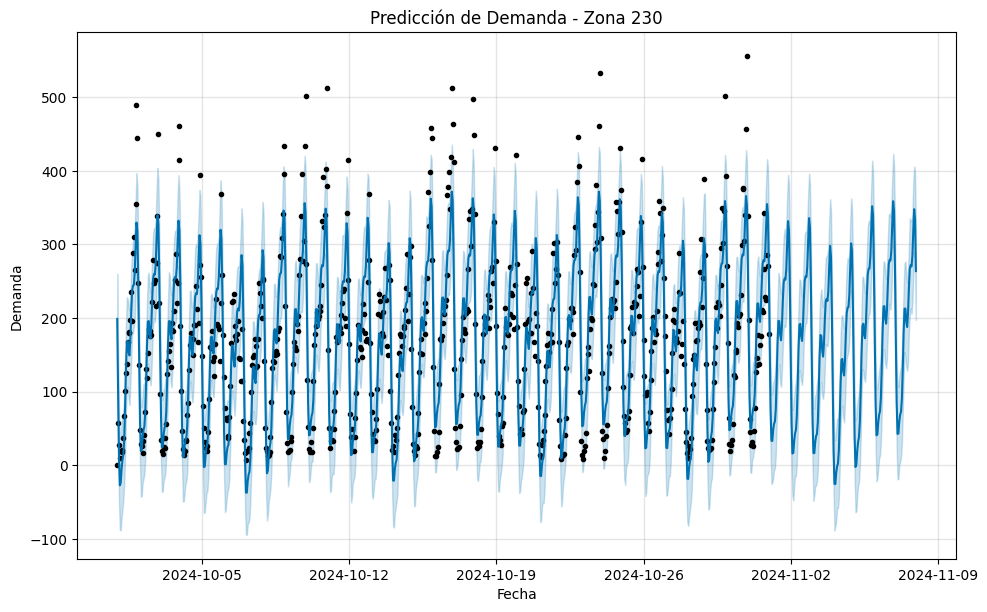

12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

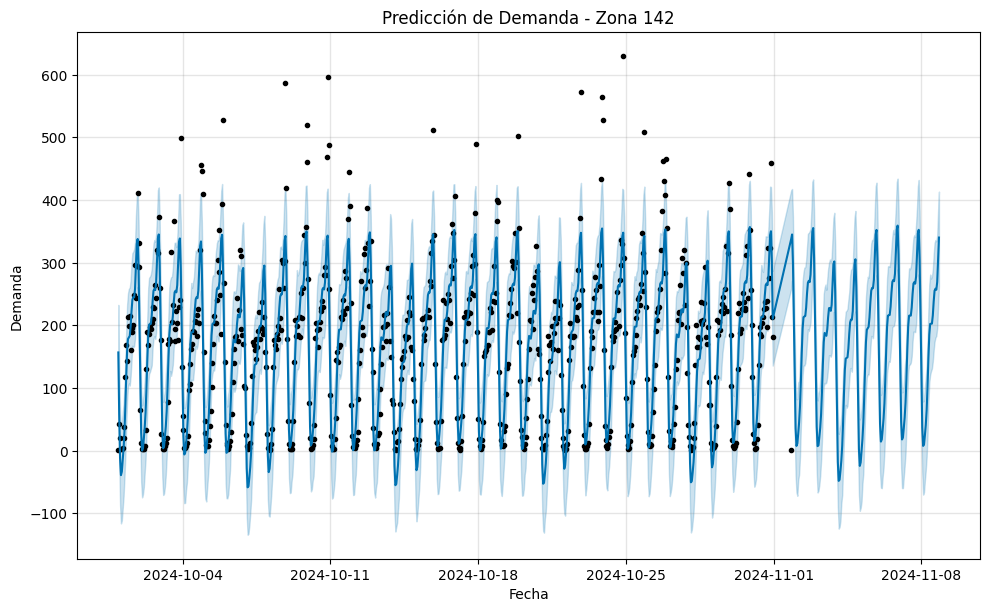

12:59:03 - cmdstanpy - INFO - Chain [1] start processing
12:59:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

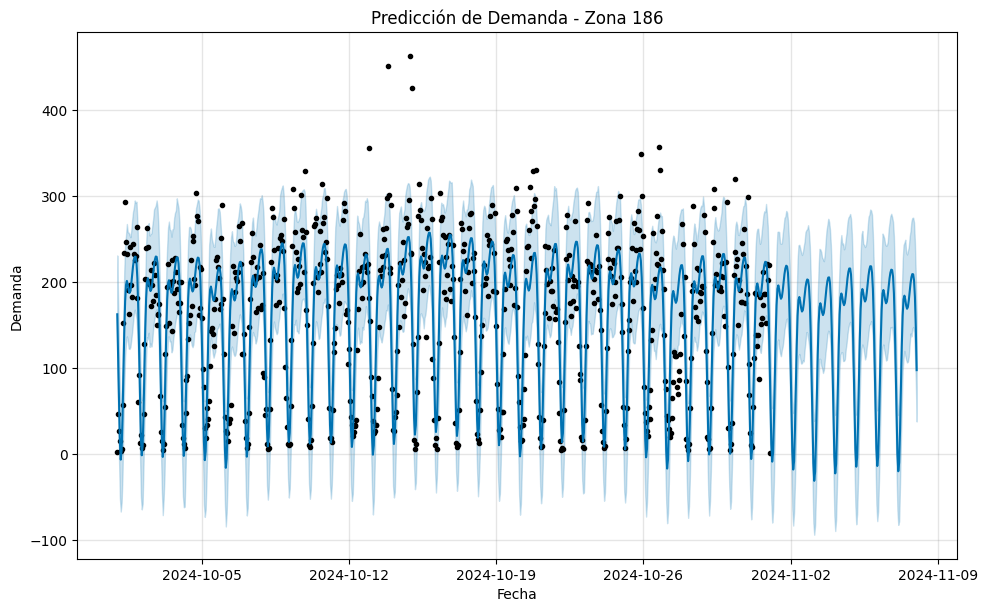

12:59:04 - cmdstanpy - INFO - Chain [1] start processing
12:59:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

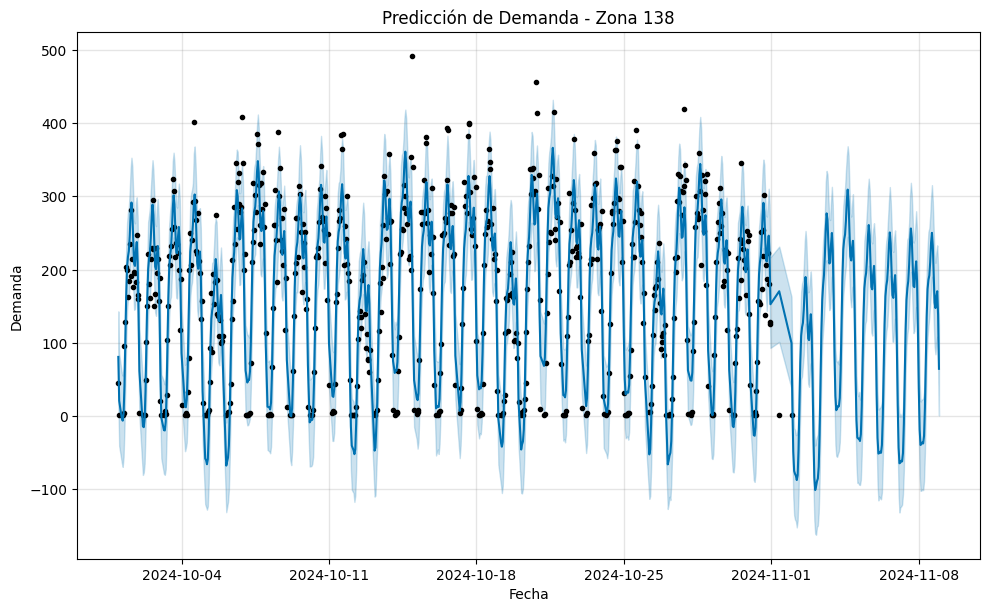

12:59:05 - cmdstanpy - INFO - Chain [1] start processing
12:59:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

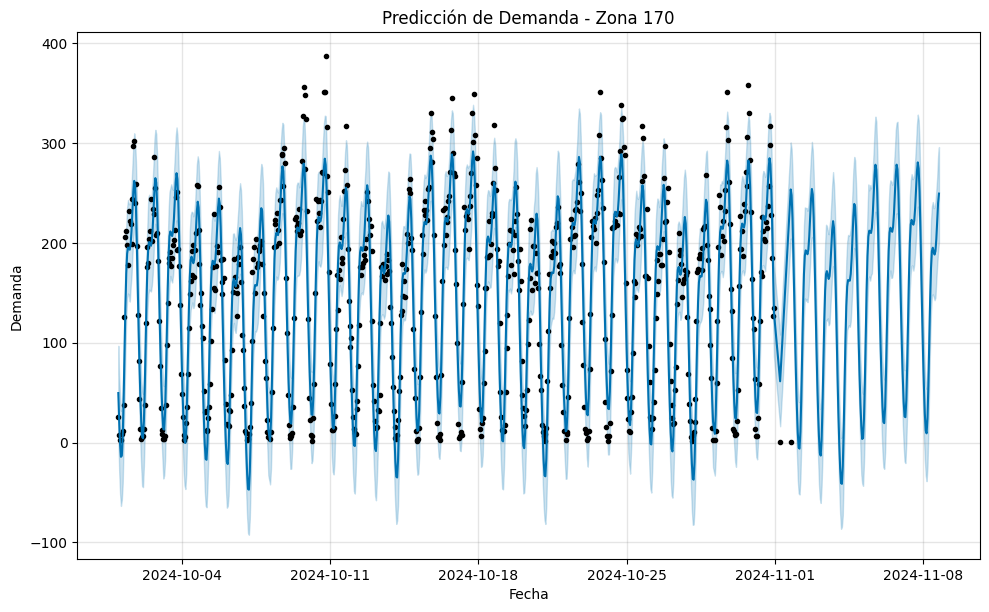

In [22]:
from prophet import Prophet  # O usa fbprophet si tienes una versión anterior
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Identificar las 10 zonas con mayor demanda
top_zones = demand_by_time_zone.groupby("PULocationID")["y"].sum().nlargest(10).index

# Filtrar datos para estas 10 zonas
top_zones_data = demand_by_time_zone[demand_by_time_zone["PULocationID"].isin(top_zones)]

# Almacenar modelos y predicciones
models = {}
future_predictions = {}

# Paso 2: Entrenar Prophet para cada zona
for zone in top_zones:
    zone_data = top_zones_data[top_zones_data["PULocationID"] == zone][["ds", "y"]]
    
    # Crear y ajustar modelo Prophet
    model = Prophet()
    model.fit(zone_data)
    models[zone] = model
    
    # Generar predicciones para el futuro
    future = model.make_future_dataframe(periods=24 * 7, freq="H")  # Predicción para 7 días
    forecast = model.predict(future)
    future_predictions[zone] = forecast
    
    # Visualizar predicciones
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f"Predicción de Demanda - Zona {zone}")
    plt.xlabel("Fecha")
    plt.ylabel("Demanda")
    plt.show()


Le ponemos los nombres a las zonas

In [23]:
# Obtener los nombres de las zonas para las 10 más importantes
zone_names = transformed_taxi_zone.set_index("locationid_x")["zone"]
top_zones_names = {zone_id: zone_names.get(zone_id, "Unknown Zone") for zone_id in top_zones}

# Actualizar el código con los nombres de las zonas
zone_named_predictions = {
    top_zones_names[zone]: forecast for zone, forecast in future_predictions.items()
}


12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

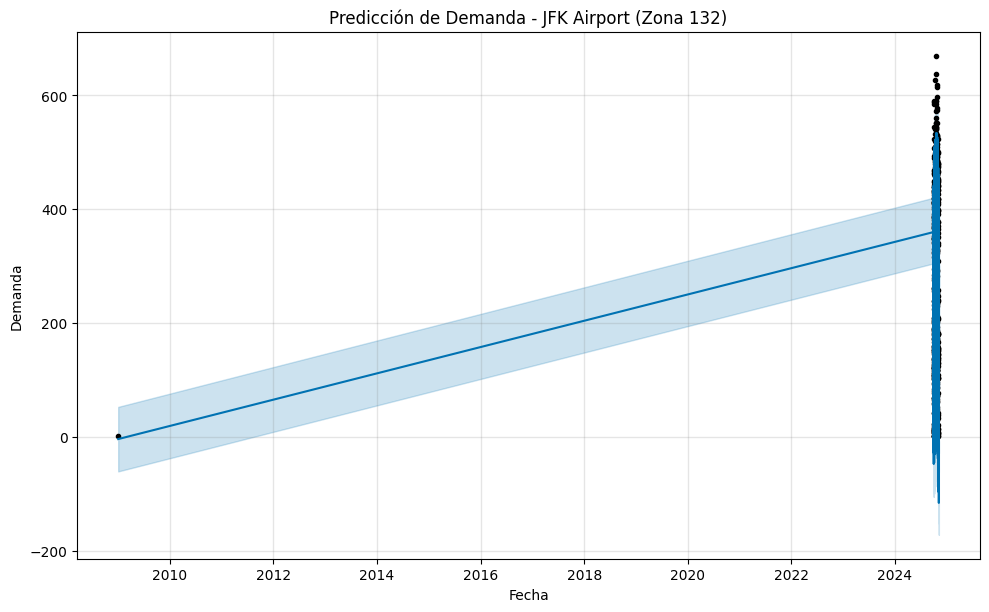

12:59:29 - cmdstanpy - INFO - Chain [1] start processing
12:59:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

12:59:30 - cmdstanpy - INFO - Chain [1] start processing
12:59:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

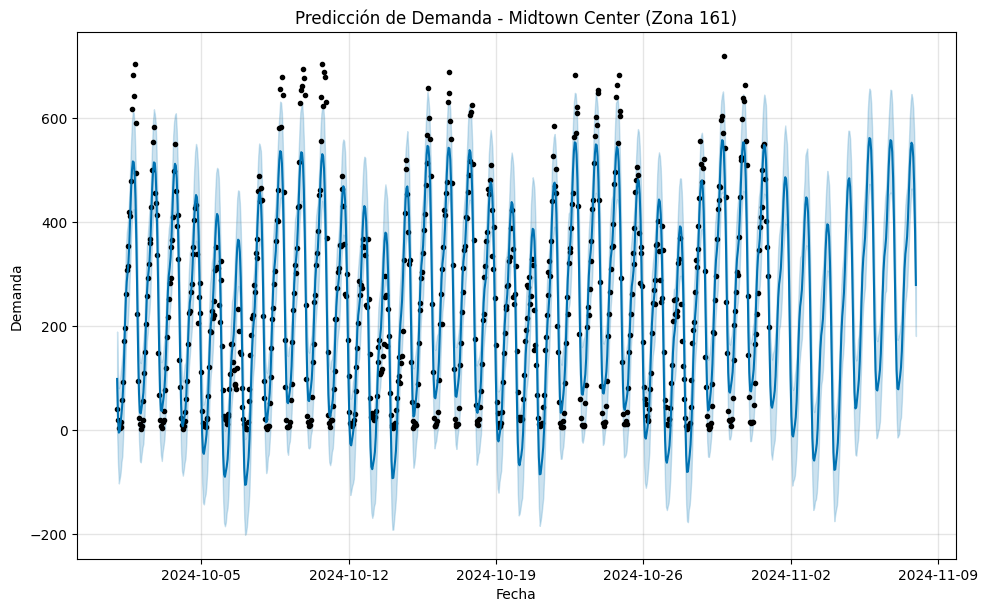

12:59:30 - cmdstanpy - INFO - Chain [1] start processing
12:59:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

12:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:59:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

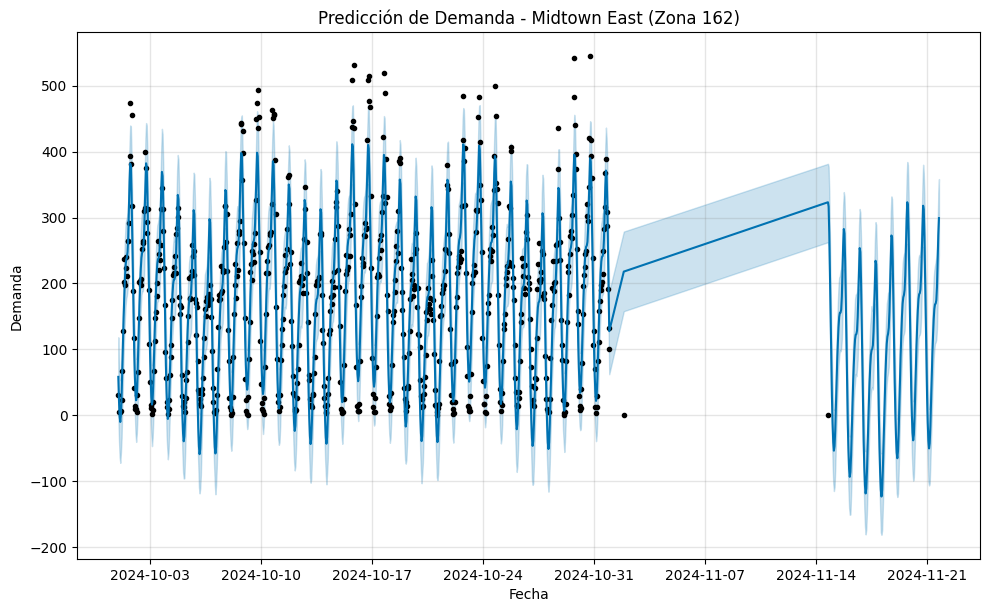

12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

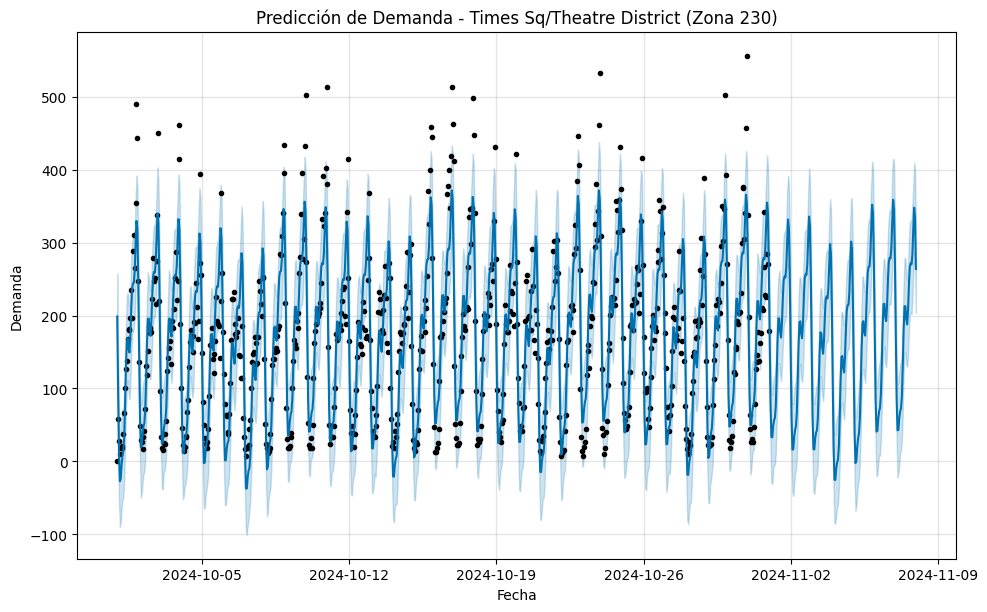

12:59:32 - cmdstanpy - INFO - Chain [1] start processing
12:59:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

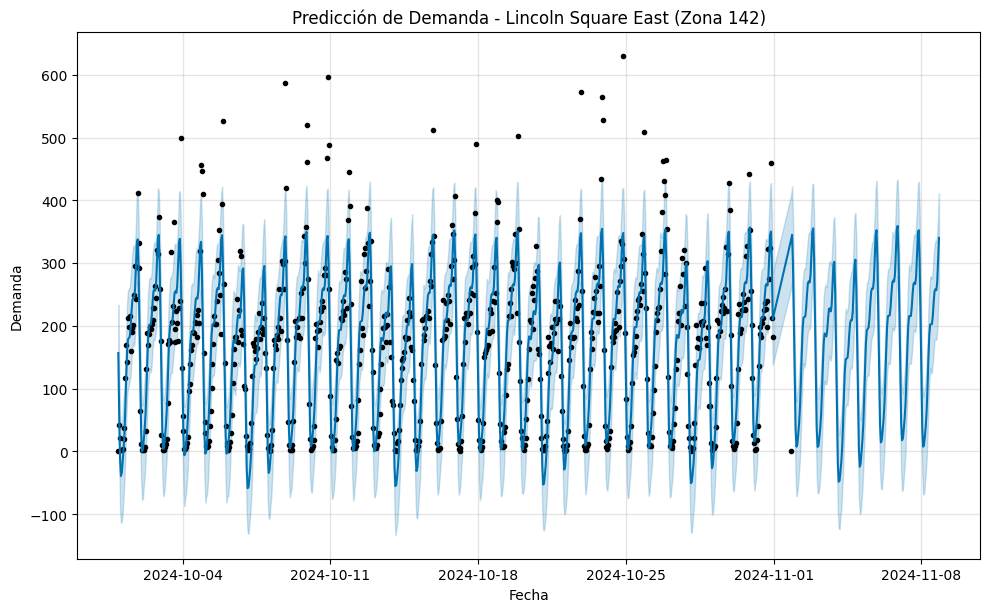

12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

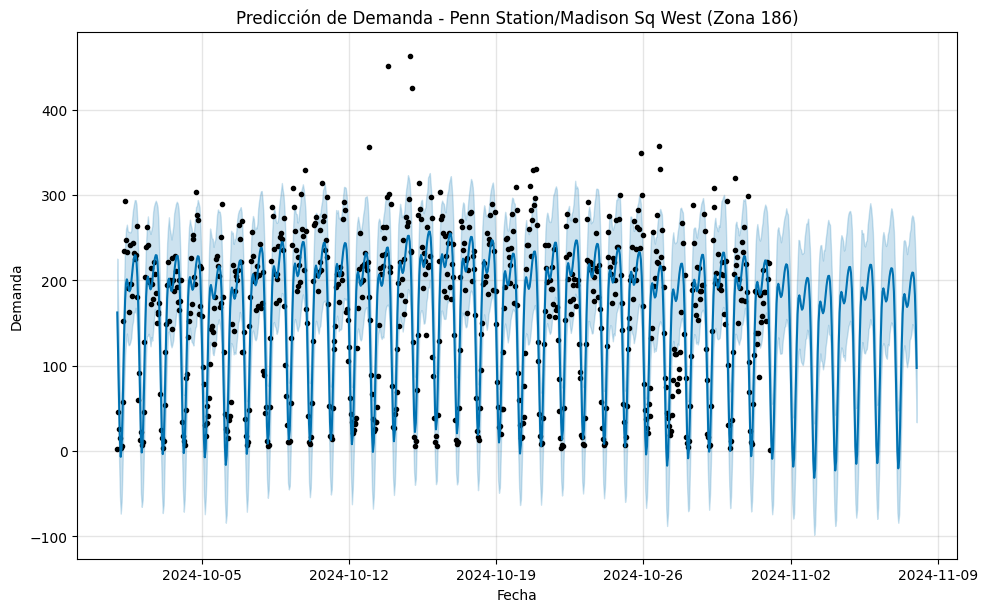

12:59:33 - cmdstanpy - INFO - Chain [1] start processing
12:59:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

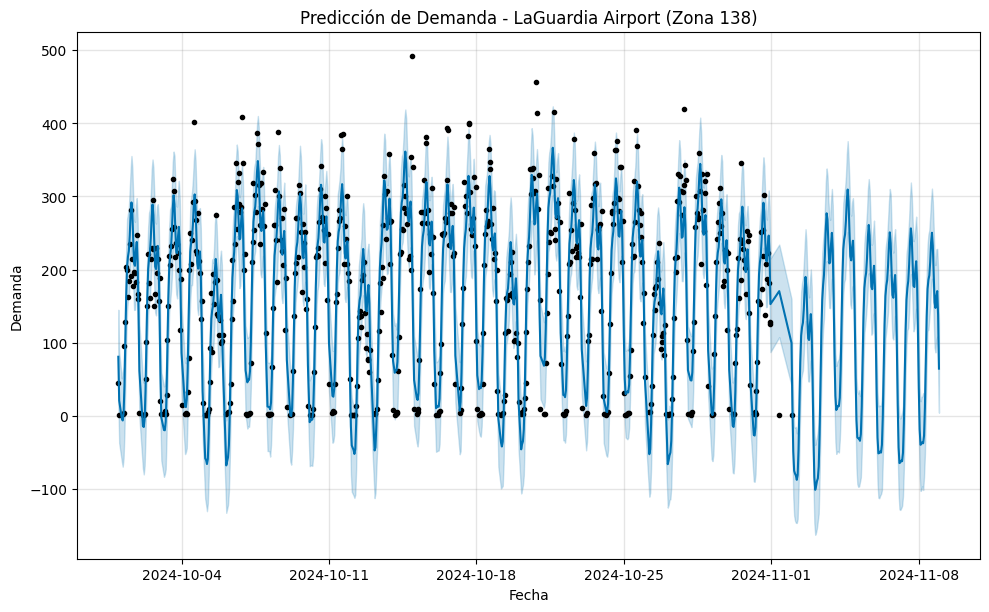

12:59:34 - cmdstanpy - INFO - Chain [1] start processing
12:59:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


<Figure size 1000x600 with 0 Axes>

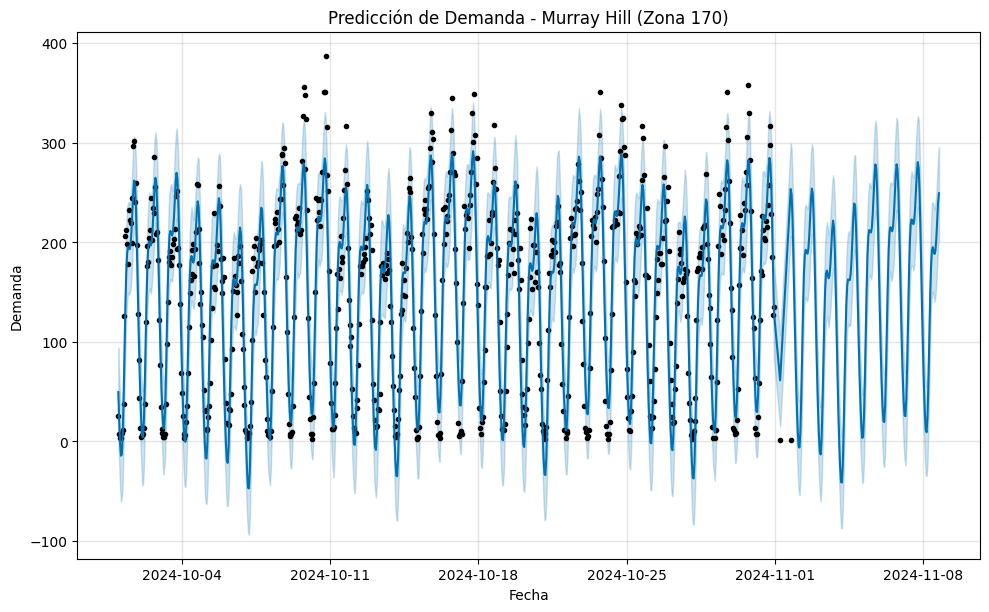

{132: 'JFK Airport',
 237: 'Upper East Side South',
 161: 'Midtown Center',
 236: 'Upper East Side North',
 162: 'Midtown East',
 230: 'Times Sq/Theatre District',
 142: 'Lincoln Square East',
 186: 'Penn Station/Madison Sq West',
 138: 'LaGuardia Airport',
 170: 'Murray Hill'}

In [24]:
# Código actualizado para la visualización con nombres
from prophet import Prophet  # O usa fbprophet si tienes una versión anterior
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Identificar las 10 zonas con mayor demanda
top_zones = demand_by_time_zone.groupby("PULocationID")["y"].sum().nlargest(10).index

# Obtener los nombres de las zonas
zone_names = transformed_taxi_zone.set_index("locationid_x")["zone"]
top_zones_names = {zone_id: zone_names.get(zone_id, "Unknown Zone") for zone_id in top_zones}

# Filtrar datos para estas 10 zonas
top_zones_data = demand_by_time_zone[demand_by_time_zone["PULocationID"].isin(top_zones)]

# Almacenar modelos y predicciones
models = {}
future_predictions = {}

# Paso 2: Entrenar Prophet para cada zona
for zone in top_zones:
    zone_data = top_zones_data[top_zones_data["PULocationID"] == zone][["ds", "y"]]
    
    # Crear y ajustar modelo Prophet
    model = Prophet()
    model.fit(zone_data)
    models[zone] = model
    
    # Generar predicciones para el futuro
    future = model.make_future_dataframe(periods=24 * 7, freq="H")  # Predicción para 7 días
    forecast = model.predict(future)
    future_predictions[zone] = forecast
    
    # Visualizar predicciones con nombres de zonas
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f"Predicción de Demanda - {top_zones_names[zone]} (Zona {zone})")
    plt.xlabel("Fecha")
    plt.ylabel("Demanda")
    plt.show()

# Mostrar los nombres de las 10 zonas más importantes
top_zones_names

# Reflexión para el Negocio: Predicción de Demanda de Taxis

La predicción de la demanda de taxis basada en series temporales y zonas estratégicas brinda una ventaja competitiva importante para el negocio. A partir de los análisis realizados y el modelo propuesto, aquí están los puntos clave a reflexionar:

1. Enfoque Estratégico en las Zonas con Mayor Demanda
    - Top Zonas: Lugares como JFK Airport, Midtown Center, y Penn Station concentran una alta demanda de taxis. Esto indica que invertir en estrategias específicas para estas zonas (como mayor disponibilidad de taxis durante horas pico) podría maximizar los ingresos.
    - Oportunidades Geográficas: Estas zonas son puntos estratégicos de entrada, salida y tránsito de personas, como aeropuertos, centros comerciales, y distritos de negocios. Asegurarse de cubrir estas áreas con eficiencia es crucial.
2. Optimización de Recursos
    - Asignación de Flota: Con las predicciones de demanda por hora, la empresa puede planificar mejor la distribución de su flota. Por ejemplo, enviar más taxis a LaGuardia Airport durante horarios específicos en lugar de mantener vehículos ociosos en zonas de baja demanda.
    - Turnos del Personal: La predicción horaria permite optimizar los turnos de los conductores, asegurando que estén disponibles en momentos de alta demanda y reduciendo costos durante las horas valle.
3. Tendencias Temporales
    - Estacionalidad: Los modelos de Prophet permiten identificar patrones recurrentes (horarios pico, días laborales vs. fines de semana). Estos patrones ofrecen insights clave para planificar promociones o ajustar tarifas dinámicamente.
    - Eventos Especiales: Predicciones fuera de lo habitual, como incrementos de demanda en zonas específicas debido a eventos (por ejemplo, Times Square durante el Año Nuevo), pueden gestionarse anticipadamente.
4. Creación de Valor
    - Experiencia del Cliente: Reducir los tiempos de espera en zonas de alta demanda mejora la satisfacción del cliente, lo cual se traduce en mayor lealtad.
    - Tarifas Competitivas: Con un análisis preciso de la demanda, la empresa puede ajustar tarifas de manera estratégica sin perjudicar al cliente ni perder margen.
5. Riesgos y Consideraciones
    - Condiciones Externas: Factores como el clima, las regulaciones gubernamentales o cambios en el transporte público pueden afectar los patrones de demanda. Incorporar estas variables en el modelo podría mejorar la precisión.
    - Competencia: Empresas rivales, como servicios de ridesharing (Uber, Lyft), también operan en estas zonas clave. Diferenciarse con mejor disponibilidad o precios competitivos será esencial.

Recomendaciones Finales

- Implementar Predicciones en Tiempo Real: Integrar modelos de demanda en un sistema en vivo para gestionar la flota en tiempo real.
- Tarifas Dinámicas: Ajustar los precios en función de la demanda para maximizar ingresos en horarios pico.
- Inversiones Estratégicas: Priorizar expansión y recursos en las zonas de alta demanda identificadas.
- Monitoreo Constante: Actualizar los modelos regularmente para capturar cambios en los patrones de demand

# Análisis de Zonas Rentables (Clustering):
Utilizaremos las coordenadas geográficas (borough_latitude, borough_longitude, zone_latitude, zone_longitude) para agrupar las zonas y determinar cuáles podrían ser las más rentables según su proximidad y características.

c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly d

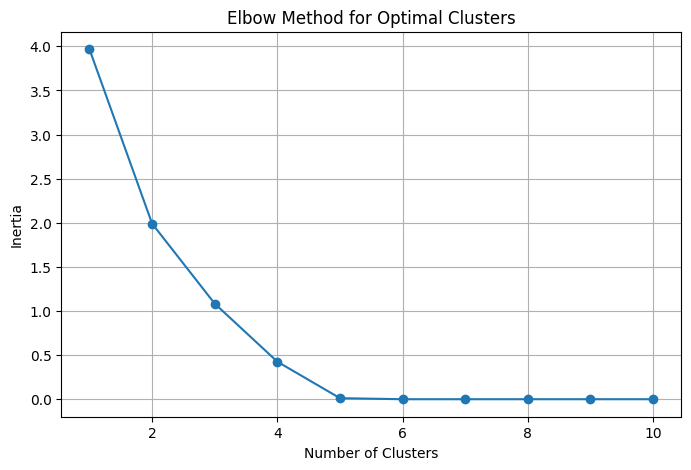

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Preprocesamiento: seleccionar columnas relevantes para la agrupación (latitud y longitud)
df_clustering = transformed_taxi_zone[['borough_latitude', 'borough_longitude']].dropna()

# Convertir a una matriz numpy para agrupación
coordinates = df_clustering.values

# Método del codo para determinar el número óptimo de grupos.
inertia = []
range_clusters = range(1, 11)  # Pruebas entre 1 y 10 grupos
%
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates)
    inertia.append(kmeans.inertia_)

# Traza la inercia para encontrar el punto del codo.
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


La gráfica del método del codo indica cuántos clusters podrían ser óptimos para agrupar las zonas en base a sus coordenadas geográficas. Generalmente, el número de clusters se elige donde la pendiente de la curva se reduce significativamente (el "codo").

A continuación, vamos a elegir un número de clusters adecuado (por ejemplo, 3 o 4) y procederemos a realizar el agrupamiento con K-Means para identificar las zonas más relevantes.

c:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


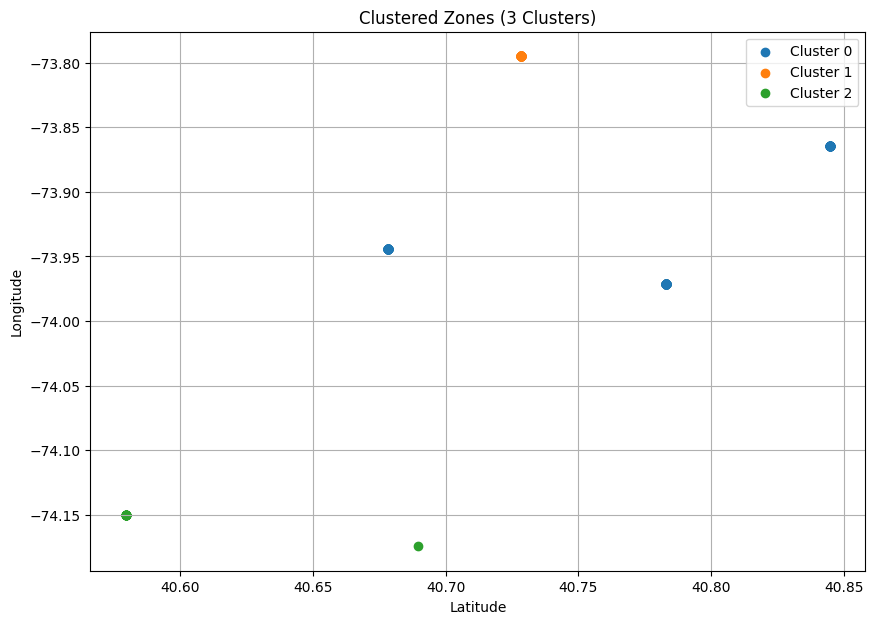

locationid_x      borough_x  cluster
0             1            EWR        2
1             2         Queens        1
2             3          Bronx        0
3             4      Manhattan        0
4             5  Staten Island        2

In [28]:
# Usamos K-Means agrupando con  3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(coordinates)

# Agregar etiquetas de clúster nuevamente al marco de datos principal
transformed_taxi_zone['cluster'] = kmeans.predict(transformed_taxi_zone[['borough_latitude', 'borough_longitude']].fillna(0))

# Visualizar los grupos en un diagrama de dispersión.
plt.figure(figsize=(10, 7))
for cluster in range(3):
    cluster_data = df_clustering[df_clustering['cluster'] == cluster]
    plt.scatter(cluster_data['borough_latitude'], cluster_data['borough_longitude'], label=f'Cluster {cluster}')

plt.title('Clustered Zones (3 Clusters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid()
plt.show()

# Mostrar las primeras filas del conjunto de datos con clusters
df2_clustered_preview = transformed_taxi_zone[['locationid_x', 'borough_x', 'cluster']].head()
df2_clustered_preview


Se han agrupado las zonas en 3 clusters basados en sus coordenadas geográficas:

Cluster 0: Principalmente incluye zonas de Queens y Bronx.
Cluster 1: Predominantemente en Manhattan.
Cluster 2: Staten Island y zonas más apartadas como Newark.
Esto permite identificar agrupaciones geográficas para focalizar estrategias de inversión. Por ejemplo:

Cluster 1 (Manhattan) puede representar alta demanda por su densidad poblacional y actividad económica.
Cluster 2 puede requerir estrategias de optimización, dado que son áreas periféricas.